In [2]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt --upgrade

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\andre\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 184.3/184.3 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 9.3 MB/s eta 0:00:00
     ---------------------------------------- 38.2/38.2 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 10.1 MB/s eta 0:00:00
     ------------------------------------- 255.1/255.1 kB 15.3 MB/s eta 0:00:00
     ---------------------------------------- 62.5/62.5 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 42.5/42.5 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 586.5/586.5 kB 9.3 MB/s eta 0:00:00
     ---------------------------------------- 10.7/10.7 MB 9.9 MB/s eta 0:00:00
     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00
     -------------------------------------

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [8]:
pip install ultralytics

  Using cached ultralytics-8.0.105-py3-none-any.whl (586 kB)
  Using cached sentry_sdk-1.23.1-py2.py3-none-any.whl (205 kB)
     ---------------------------------------- 14.7/14.7 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
easyocr 1.4.2 requires opencv-python-headless<=4.5.4.60, which is not installed.
tf-gpu 1.15.5.2205 requires tensorboard<1.16.0,>=1.15.0, but you have tensorboard 2.10.0 which is incompatible.
tf-gpu 1.15.5.2205 requires tensorflow-estimator==1.15.1, but you have tensorflow-estimator 2.7.0 which is incompatible.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.10.0 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
model = torch.hub.load('yolov5', 'yolov5s', source='local')

YOLOv5  v7.0-168-gec2b853 Python-3.9.7 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)



requirements: C:\Users\andre\AppData\Local\Programs\Python\Python39\Lib\site-packages\requirements.txt not found, check failed.


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [10]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [5]:
model(img).print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 609.0ms pre-process, 63.9ms inference, 23.7ms NMS per image at shape (1, 3, 384, 640)


In [15]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 158.0ms pre-process, 7.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


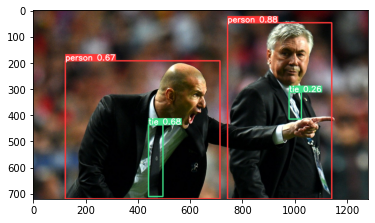

In [16]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [17]:
!pip install pyautogui


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pyautogui

In [2]:
while True:
    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    cropped_region = screen_array[0:650, 1100:, :]
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

NameError: name 'pyautogui' is not defined

In [7]:
import uuid
import os
import time

In [8]:
IMAGES_PATH = os.path.join('data', 'images')
number_imgs = 100

In [31]:
for img_num in range(number_imgs):
    print('Collecting image number {}'.format(img_num))

    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    cropped_region = screen_array[0:650, 1100:, :]

    imgname = os.path.join(IMAGES_PATH, str(uuid.uuid1())+'.jpg')
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    cv2.imwrite(imgname, corrected_colors)

    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    time.sleep(0.2)

    if cv2.waitKey(1) & 0xFF==ord('q'):
        break

cv2.destroyAllWindows()

In [32]:
!git clone https://github.com/heartexlabs/labelImg.git

Cloning into 'labelImg'...


In [33]:
!pip install pyqt5 lxml --upgrade

     ---------------------------------------- 6.8/6.8 MB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 3.9/3.9 MB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 78.4/78.4 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: PyQt5-sip
    Found existing installation: PyQt5-sip 12.9.1
    Uninstalling PyQt5-sip-12.9.1:
      Successfully uninstalled PyQt5-sip-12.9.1
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.1
    Uninstalling lxml-4.9.1:
      Successfully uninstalled lxml-4.9.1
  Attempting uninstall: pyqt5
    Found existing installation: PyQt5 5.15.6
    Uninstalling PyQt5-5.15.6:
      Successfully uninstalled PyQt5-5.15.6



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [9]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 2000 --data dataset.yml --hyp hyp.scratch.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=hyp.scratch.yaml, epochs=2000, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   ec2b853..c3c1304  master              -> origin/master
 * [new branch]      ultralytics_cleanup -> origin/ultralytics_cleanup
github:  YOLOv5 is out of date by 4 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
Traceback (most recent call last):
  File "c:\Users\andre\Documents\ObjectDetection\yolov5\train.py", line 642, in <module>
    m

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 2000 --data dataset.yml --hyp hyp.scratch-low.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=hyp.scratch-low.yaml, epochs=2000, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 4 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-168-gec2b853 Python-3.9.7 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.

    36/1999     0.958G    0.07635     0.0152   0.009216         49        320:  25%|██▌       | 1/4 [00:00<00:00,  9.29it/s]
    36/1999     0.958G    0.07515    0.01477     0.0108         49        320:  25%|██▌       | 1/4 [00:00<00:00,  9.29it/s]
    36/1999     0.958G    0.07515    0.01477     0.0108         49        320:  50%|█████     | 2/4 [00:00<00:00,  9.19it/s]
    36/1999     0.958G    0.07456    0.01493   0.009444         46        320:  50%|█████     | 2/4 [00:00<00:00,  9.19it/s]
    36/1999     0.958G     0.0731    0.01438   0.008304          5        320:  50%|█████     | 2/4 [00:00<00:00,  9.19it/s]
    36/1999     0.958G     0.0731    0.01438   0.008304          5        320: 100%|██████████| 4/4 [00:00<00:00, 10.53it/s]
    36/1999     0.958G     0.0731    0.01438   0.008304          5        320: 100%|██████████| 4/4 [00:00<00:00, 10.21it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/2 [00:00<?, ?it

In [11]:
model = torch.hub.load('yolov5', 'custom', source='local', path='yolov5/runs/train/exp/weights/best.pt')

YOLOv5  v7.0-168-gec2b853 Python-3.9.7 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 


requirements: C:\Users\andre\AppData\Local\Programs\Python\Python39\Lib\site-packages\requirements.txt not found, check failed.


Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [54]:
img = os.path.join('data', 'images', '0e5521bf-f73a-11ed-b337-4c796ed475e6.jpg')

In [55]:
results = model(img)

In [20]:
results.print()

image 1/1: 650x820 3 dinos, 3 cactuss
Speed: 5.0ms pre-process, 9.0ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)


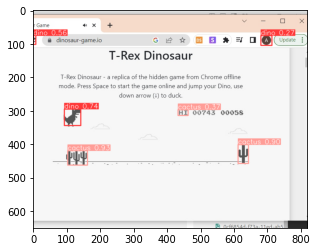

In [21]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [56]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,103.545685,419.862030,162.925156,462.060089,0.929853,1,cactus
1,611.386047,401.574829,642.477173,457.964539,0.900037,1,cactus
2,93.304955,295.243561,142.399292,344.718719,0.737754,0,dino
3,0.098736,76.375740,8.111550,102.902893,0.559938,0,dino
4,432.526550,297.249695,462.591827,314.447845,0.372192,1,cactus
5,679.337036,76.685349,712.874939,105.644447,0.265786,0,dino


In [57]:
results.pandas().xyxy[0].iloc[5]['xmin']

679.3370361328125

In [61]:
for i in range(len(df)):
    print(df.iloc[i]['xmin'])

103.54568481445312
611.3860473632812
93.3049545288086
0.09873585402965546
432.52655029296875
679.3370361328125


In [94]:
pyautogui.click(961, 1169)
time.sleep(1)
pyautogui.click(1400, 375)
while True:
    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    cropped_region = screen_array[0:650, 1100:, :]
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    results = model(corrected_colors)
    
    my_img = np.squeeze(results.render())
    df = results.pandas().xyxy[0]
    
    for i in range(len(df)):
        x_center = int(df.iloc[i]['xmin'] + (df.iloc[i]['xmax'] - df.iloc[i]['xmin']) / 2)
        y_center = int(df.iloc[i]['ymin'] + (df.iloc[i]['ymax'] - df.iloc[i]['ymin']) / 2)
        cv2.circle(my_img, (x_center, y_center), 3, (0, 0, 255), 2)
    cv2.imshow('YOLO', my_img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()